# Practical Statistics for Data Scientists

# Chapter 1 - Exploratory Data Analysis

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
from statistics import variance

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
medal_count = pd.read_excel('C:/Users/riddh/Downloads/archive (9)/Medals.xlsx')
print(medal_count)

    Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0      1    United States of America    39      41      33    113   
1      2  People's Republic of China    38      32      18     88   
2      3                       Japan    27      14      17     58   
3      4               Great Britain    22      21      22     65   
4      5                         ROC    20      28      23     71   
..   ...                         ...   ...     ...     ...    ...   
88    86                       Ghana     0       0       1      1   
89    86                     Grenada     0       0       1      1   
90    86                      Kuwait     0       0       1      1   
91    86         Republic of Moldova     0       0       1      1   
92    86        Syrian Arab Republic     0       0       1      1   

    Rank by Total  
0               1  
1               2  
2               5  
3               4  
4               3  
..            ...  
88             77  
89         

C:\Users\riddh\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### (Data typing in software acts as a signal to the software on how to process the data)

## Estimates of Location

#### To make sense of a set of data, we can find an average value that represents the whole group of numbers. This is called central tendency of the data and it helps understand where most of the data is located.

In [3]:
#Mean
medal_count["Total"].mean()

11.612903225806452

In [4]:
#Weighted Mean (When weight is an important factor)
np.average(medal_count["Total"], weights = medal_count["Gold"])

46.832352941176474

In [5]:
#Trimmed Mean ( Robust to outliers but uses more data)
trim_mean(medal_count["Total"],0.1)

6.8933333333333335

In [6]:
#Median (50th percentile)
medal_count["Total"].median()

4.0

In [7]:
#Weighted Median (Robust to outliers)
wquantiles.median(medal_count['Total'], weights=medal_count['Gold'])

39.400000000000006

#### (When outliers are a result of bad data, the mean will result in a poor estimate while the median will still be valid)

In [8]:
#Percentile
q3 = np.percentile(medal_count["Total"],75)
q3

11.0

#### (Statisticians estimate and data scientists measure)

In [9]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability

#### Estimate of Variability is a measure of how spread out the values of a dataset are from each other.

In [10]:
#Standard Deviation (sensitive to outliers)
medal_count['Gold'].std()

7.022471111671379

In [11]:
#IQR (Q3-Q1)
medal_count['Total'].quantile(0.75) - medal_count['Total'].quantile(0.25)

9.0

In [12]:
#Variance
variance(medal_count["Gold"])

49.315100514259

#### (Deviation measures the distance between a data point and the mean, while variance measures the average of the squared distances from the mean)

In [13]:
#Mean Absolute Deviation
from numpy import mean , absolute
mean(absolute(medal_count["Gold"] - mean(medal_count["Gold"])))

4.0048560527228485

In [14]:
#Median Absolute Deviation
print(robust.scale.mad(medal_count['Gold']))
print(abs(medal_count['Gold'] - medal_count['Gold'].median()).median() / 0.6744897501960817)

1.482602218505602
1.482602218505602


#### (We may choose to calculate MAD instead of variance or standard deviation when we want a measure of variability that is more robust to outliers and does not involve squaring the deviations)

#### (Standard deviation and variance are sensitive to outliers. Hence standard deviation is almost twice as large as the MAD)

## Exploring the Data Distribution

### Percentiles 

In [15]:
medal_count['Gold'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]) #Quantile is a cutoff point.

0.05     0.0
0.25     0.0
0.50     1.0
0.75     3.0
0.95    18.2
Name: Gold, dtype: float64

In [16]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(medal_count['Total'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

       5.0%  25.0%  50.0%  75.0%  95.0%
Total   1.0    2.0    4.0   11.0   50.8


### Boxplots

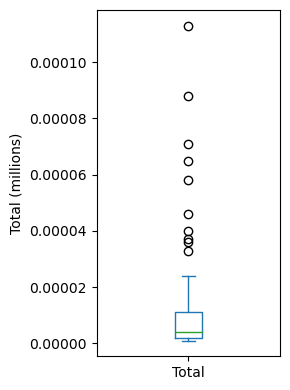

In [17]:
ax = (medal_count['Total']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Total (millions)')

plt.tight_layout()
plt.show()

### Frequency Tables and Histograms

In [18]:
#Frequency Table
frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


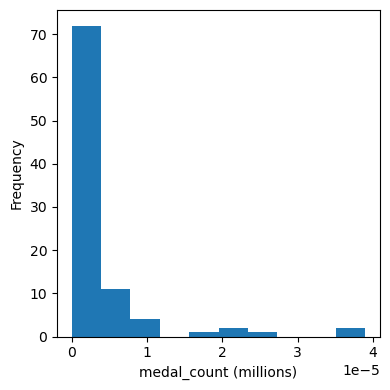

In [19]:
#Histogram
ax = (medal_count['Gold'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('medal_count (millions)')

plt.tight_layout()
plt.show()

 #### (Histogram is a way to visualize frequency table)

#### Destiny Estimates

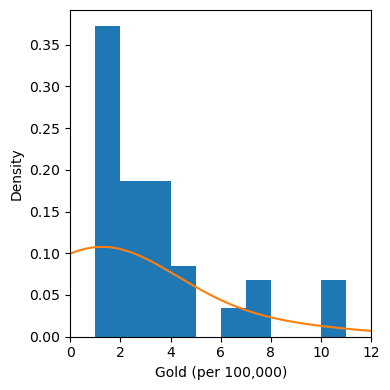

In [20]:
ax = medal_count['Gold'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
medal_count['Gold'].plot.density(ax=ax)
ax.set_xlabel('Gold (per 100,000)')

plt.tight_layout()
plt.show()

### Exploring Binary and Categorical Data

In [21]:
#Mode
medal_count["Gold"].mode()

0    0
Name: Gold, dtype: int64

#### (Expected value is the sum of values times their probability of occurance, often used to sum up factor variable levels: E(x) = sum[xi*P(xi)])

#### (Probability that an event will happen is the proportion of times it will occur if the situation could be repeated countless times)

Text(0, 0.5, 'Country')

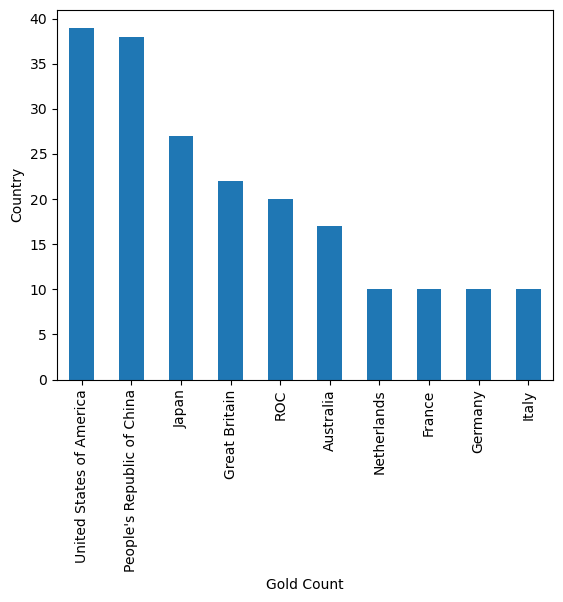

In [22]:
#Bar Chart (Categorical data is typically summed up in proportions and can be visualized in a bar chart)
ax = medal_count.iloc[:10, :].plot.bar(x="Team/NOC", y="Gold", legend=False)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')

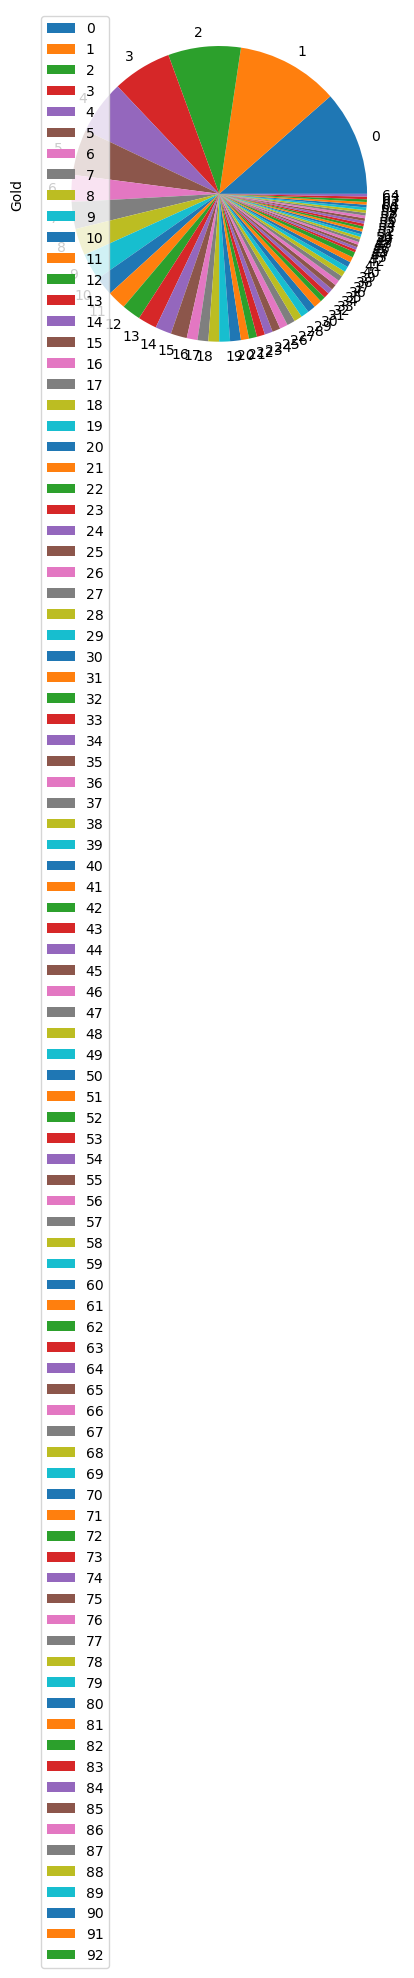

In [23]:
#Pie Chart

ax = medal_count.plot.pie(y="Gold")

### Correlation

In [24]:
#Correlation Matrix

medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


#### (Correlation coefficient is a statistical measure that quantifies the degree of association between two variables. It ranges from -1(perfectly negative correlation) to +1(perfectly positive correlation) where 0 indicates no correlation.)

#### (Values produced by correlation metric are not very meaningful, except by reference to the resampling distribution)

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

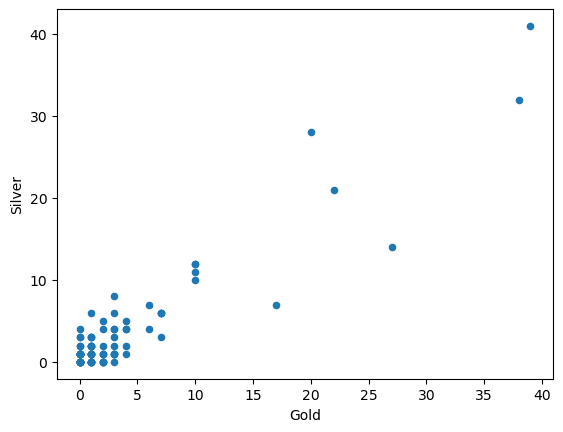

In [25]:
medal_count.plot.scatter(x = "Gold", y = "Silver")

### Exploring Two or More Variables

<AxesSubplot:xlabel='Gold', ylabel='Total'>

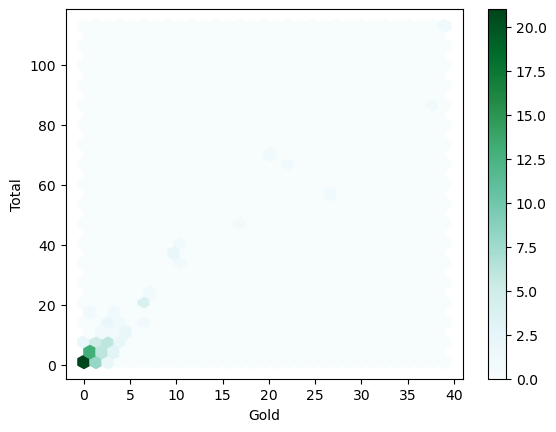

In [26]:
#Hexagonal Binning
medal_count.plot.hexbin(x="Gold", y="Total", gridsize = 30, sharex = False)

C:\Users\riddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

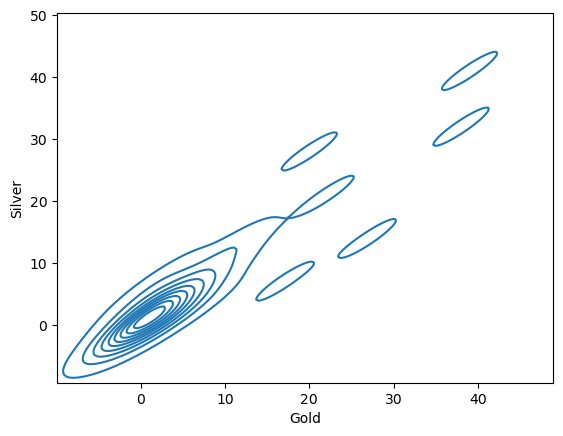

In [27]:
#Contour Plot
ax = sns.kdeplot(medal_count["Gold"], medal_count["Silver"])
ax

<AxesSubplot:>

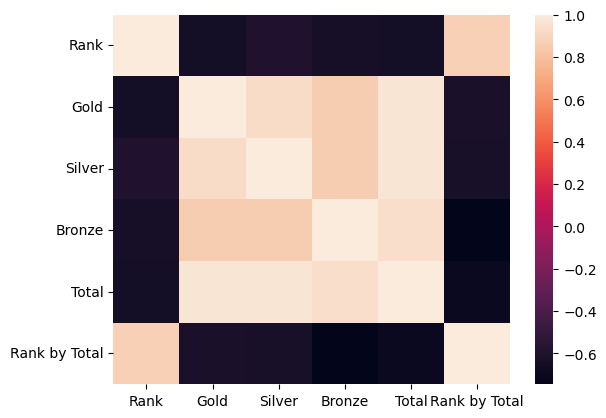

In [28]:
#Heatmap for visualization of correlation
sns.heatmap(medal_count.corr())

### Two Categorical Variables

In [29]:
#Contingency Table (Standardized tools for looking at the counts of 2 categorical variables)
crosstab = medal_count.pivot_table(index = 'Team/NOC', columns = 'Gold', aggfunc = lambda x : len(x), margins = True)
crosstab.fillna(0)

Bronze                                             \
Gold                          0     1     2     3    4    6    7   10   17   
Team/NOC                                                                     
Argentina                   1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Armenia                     1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Australia                   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  1.0   
Austria                     0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Azerbaijan                  1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
...                         ...   ...   ...   ...  ...  ...  ...  ...  ...   
Ukraine                     0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
United States of America    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Uzbekistan                  0.0   0.0   0.0   1.0  0.0  0.0  0.0  0.0  0.0   
Venezuela                   0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
All                        28.0  22.0  11.0  11.0  5.0  2.0  4.0  4.0  1.0   

                               ... Total                                     \
Gold                       20  ...     6    7   10   17   20   22   27   38   
Team/NOC                       ...                                            
Argentina                 0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Armenia                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Australia                 0.0  ...   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
Austria                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Azerbaijan                0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                       ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
Ukraine                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
United States of America  0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Uzbekistan                0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Venezuela                 0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
All                       1.0  ...   2.0  4.0  4.0  1.0  1.0  1.0  1.0  1.0   

                                   
Gold                       39 All  
Team/NOC                           
Argentina                 0.0   1  
Armenia                   0.0   1  
Australia                 0.0   1  
Austria                   0.0   1  
Azerbaijan                0.0   1  
...                       ...  ..  
Ukraine                   0.0   1  
United States of America  1.0   1  
Uzbekistan                0.0   1  
Venezuela                 0.0   1  
All                       1.0  93  

[94 rows x 75 columns]

C:\Users\riddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold'>

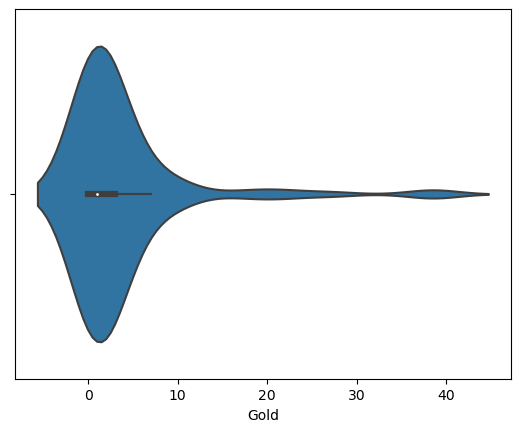

In [30]:
#Violin Plot
sns.violinplot(medal_count["Gold"])

#### Categorical and Numerical Data

Text(0, 0.5, 'Value')

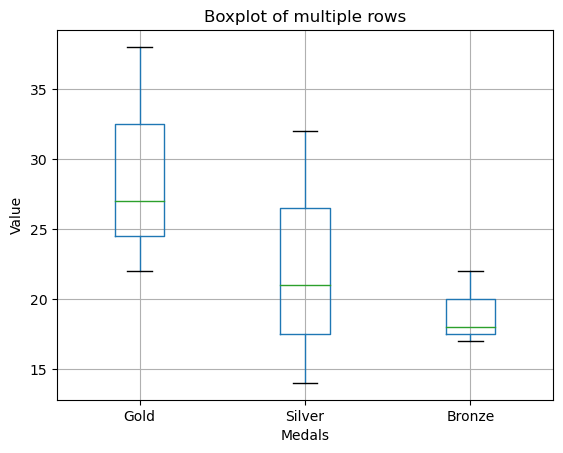

In [31]:
data_subset = medal_count.iloc[1:4, 1:5]
fig, ax = plt.subplots()
data_subset.boxplot(ax=ax)
ax.set_title("Boxplot of multiple rows")
ax.set_xlabel("Medals")
ax.set_ylabel("Value")